## 5Phase H2O TABLE
### CONVERT TO ANEOS STD+EXT FORMATS FOR COMPATIBILITY WITH EOS_TABLE MODULE

S. T. Stewart

2/16/2022


In [1]:
# Record the verions information for these calculation for posterity
import platform
print('python version: ',platform.python_version())
del platform
import matplotlib
print('matplotlib version: ', matplotlib.__version__)
del matplotlib
import numpy
print('numpy version: ', numpy.__version__)
del numpy
import scipy
print('scipy version: ', scipy.__version__)
del scipy
#import pandas
#print('pandas version: ', pandas.__version__)
#del pandas

# this prevents some error messages for inline plotting in a jupyter notebook
#%matplotlib inline 
# import python libraries
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from copy import deepcopy
import numpy as np
#from scipy import interpolate
from scipy.io import readsav # read IDL sav files
import colormaps as local_cmaps
import subprocess


import eos_table as etab # Stewart group EOS table libraries
print('eos_table version: ', etab.__version__)
#
plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams["patch.force_edgecolor"] = True
#


python version:  3.9.13
matplotlib version:  3.5.2
numpy version:  1.21.5
scipy version:  1.9.1
eos_table version:  v1.1.2


In [2]:
MODELNAME='5PhaseEOSv8.3'
# Header information must all be compatible with float format
MATID = 1.0        # MATID number
DATE = 230216.     # Date as a single 6-digit number YYMMDD
VERSION = 1.0      # ANEOS Parameters Version number
FMN = 10           # Formula weight in atomic numbers H2O
FMW = 18.          # Formula molecular weight (g/mol) for H2O
# The following define the default initial state for material in the 201 table
R0REF   = 1.0      # g/cm3 *** R0REF is inserted into the density array
K0REF   = 2E10     # dynes/cm2
T0REF   = 298.     # K -- *** T0REF is inserted into the temperature array
P0REF   = 1.E6     # dynes/cm2 -- this defines the principal Hugoniot calculated below
#
# READ IN NEW ANEOS MODEL and fill the extEOStable class object
# source in eostable.py
#------------------------------------------------------------------
NewEOS  = etab.extEOStable() # FIRST make new empty EOS object
#NewEOS.loadextsesame('NEW-SESAME-EXT.TXT') # LOAD THE EXTENDED 301 SESAME FILE GENERATED BY STSM VERSION OF ANEOS
#NewEOS.loadstdsesame('NEW-SESAME-STD.TXT') # LOAD THE STANDARD 301 SESAME FILE GENERATED BY STSM VERSION OF ANEOS
NewEOS.MODELNAME = MODELNAME # string set above in user input
#print(NewEOS.units) # these are the default units for SESAME rho-T tables
#'Units: g/cm3, K, GPa, MJ/kg, MJ/kg, MJ/K/kg, cm/s, MJ/K/kg, KPA flag. 2D arrays are (NT,ND).'

# Add the header info to the table. This could be done during the loading. 
# if made from this notebook, these values are set in the user-input above.
# ** MAKE SURE THEY MATCH ANEOS.INPUT **
NewEOS.MATID   = MATID
NewEOS.DATE    = DATE
NewEOS.VERSION = VERSION
NewEOS.FMN     = FMN
NewEOS.FMW     = FMW
NewEOS.R0REF   = R0REF
NewEOS.K0REF   = K0REF
NewEOS.T0REF   = T0REF
NewEOS.P0REF   = P0REF
#

In [3]:
# Load the 5Phase water EOS
# note that the HFE field is actually Specific Entropy; so make the correction
# Table is in BCAT/SESAME units:
# K, GPa, g/cm3, MJ/kg, MJ/kg/K
#darr = darr/1.d3 ; g/cm3
#parr = parr/1.d3 ; GPa
#earr = earr/1.d3 ; MJ/kg
#sarr = sarr/1.d3 ; MJ/kg/K
#rho0_ref = rho0_ref/1.d3 ; g/cm3
#k0_ref = k0_ref / 1.d3 ; GPa

# standard SESAME TABLE UNITS
NewEOS.units = 'Units: rho g/cm3, T K, P GPa, U MJ/kg, A MJ/kg, S MJ/K/kg, cs cm/s, cv MJ/K/kg, KPA flag. 2D arrays are (NT,ND).'

NewEOS.loadstdsesame('h2o_table_v8.3bNT.txt')

NewEOS.S = deepcopy(NewEOS.A)
NewEOS.A[:,:] = 0.0
NewEOS.cs = deepcopy(NewEOS.A)
NewEOS.cv = deepcopy(NewEOS.A)
NewEOS.KPA = deepcopy(NewEOS.A)


In [4]:
origeos = readsav('h2o_table_v8.3bNT.sav')
list(origeos)

['tarr',
 'darr',
 'tijarr',
 'dijarr',
 'sarr',
 'earr',
 'parr',
 'tsize',
 'dsize',
 'phasearr']

In [5]:
#len(origeos['phasearr'])
print(origeos['tsize'])
print(origeos['dsize'])
tmp = deepcopy(origeos['phasearr']).astype('str')
tmp  = np.swapaxes(tmp,0,1)
print(tmp)


230.0
345.0
[['ZZ' 'ZZ' 'ZZ' ... 'ZZ' 'ZZ' 'ZZ']
 ['ZZ' 'V1' 'V1' ... ' 7' ' 7' ' 7']
 ['ZZ' 'V1' 'V1' ... ' 7' ' 7' ' 7']
 ...
 ['ZZ' 'ES' 'ES' ... 'ES' 'ES' 'ES']
 ['ZZ' 'ES' 'ES' ... 'ES' 'ES' 'ES']
 ['ZZ' 'ES' 'ES' ... 'ES' 'ES' 'ES']]


In [6]:
print(np.unique(tmp))
print(tmp.shape)
print(NewEOS.KPA.shape)
print(NewEOS.NT)

[' 1' ' 6' ' 7' ' L' ' S' ' V' '16' '1L' '67' 'ES' 'L6' 'L7' 'S7' 'V1'
 'VL' 'ZZ']
(230, 345)
(230, 345)
230


In [7]:
print(np.unique(NewEOS.KPA))

[0.]


In [8]:
for i in range(NewEOS.NT):
    for j in range(NewEOS.ND):
        if tmp[i,j] == ' 1':
            NewEOS.KPA[i,j] = 1.
        if tmp[i,j] == ' 6':
            NewEOS.KPA[i,j] = 2.
        if tmp[i,j] == ' 7':
            NewEOS.KPA[i,j] = 3.
        if tmp[i,j] == ' L':
            NewEOS.KPA[i,j] = 4.
        if tmp[i,j] == ' S':
            NewEOS.KPA[i,j] = 5.
        if tmp[i,j] == ' V':
            NewEOS.KPA[i,j] = 6.
        if tmp[i,j] == '16':
            NewEOS.KPA[i,j] = -1
        if tmp[i,j] == '1L':
            NewEOS.KPA[i,j] = -2
        if tmp[i,j] == '67':
            NewEOS.KPA[i,j] = -3
        if tmp[i,j] == 'ES':
            NewEOS.KPA[i,j] = -4
        if tmp[i,j] == 'L6':
            NewEOS.KPA[i,j] = -5
        if tmp[i,j] == 'L7':
            NewEOS.KPA[i,j] = -6
        if tmp[i,j] == 'S7':
            NewEOS.KPA[i,j] = -7
        if tmp[i,j] == 'V1':
            NewEOS.KPA[i,j] = -8
        if tmp[i,j] == 'VL':
            NewEOS.KPA[i,j] = -9
        if tmp[i,j] == 'ZZ':
            NewEOS.KPA[i,j] = -10
        
print(np.unique(NewEOS.KPA))

[-10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.   1.   2.   3.   4.
   5.   6.]


In [9]:
#print('Min pressure (Pa)',min(NewEOS.P))
print('Min density (g/cm3)',min(NewEOS.rho))
print('Max density (g/cm3)',max(NewEOS.rho))
print('Min temperature (T)',min(NewEOS.T))
print('Max temperature (T)',max(NewEOS.T))
print(NewEOS.rho[1])

Min density (g/cm3) 0.0
Max density (g/cm3) 5.0
Min temperature (T) 0.0
Max temperature (T) 100000.0
5.00000007e-14


In [10]:
# Read in phase boundaries from NIST
# UNITS: t K, rho kg/m3, P MPa, E kJ/kg, S kJ/kg/K
# have as IDL sav files
dir='./phase-boundaries/'
meltcurvefile = dir+'meltcurve.sav'
meltcurve = readsav(meltcurvefile)
#print(meltcurve.keys())
#print(meltcurve['tmeltall'])
satcurvefile = dir+'satcurve.sav'
satcurve = readsav(satcurvefile)
#print(satcurve.keys())
subcurvefile = dir+'subcurve.sav'
subcurve = readsav(subcurvefile)
#print(subcurve.keys())


NewEOS.vc.T = satcurve['tsatall'] # K
NewEOS.vc.P = satcurve['psatall']/1.e3 # MPa -> GPa
NewEOS.vc.rl = satcurve['dlsatall']/1.e3 # kg/m3 -> g/cm3
NewEOS.vc.rv = satcurve['dvsatall']/1.e3 # kg/m3 -> g/cm3
NewEOS.vc.sl = satcurve['slsatall']/1.e3 # kJ/K/kg -> MJ/K/kg
NewEOS.vc.sv = satcurve['svsatall']/1.e3 # kJ/K/kg -> MJ/K/kg
NewEOS.vc.el = satcurve['elsatall']/1.e3 # kJ/kg -> MJ/kg
NewEOS.vc.ev = satcurve['evsatall']/1.e3 # kJ/kg -> MJ/kg

NewEOS.mc.T = meltcurve['tmeltall']# K
NewEOS.mc.P = meltcurve['pmeltall']/1.e3 # MPa -> GPa
NewEOS.mc.rl = meltcurve['dmeltall']/1.e3 # kg/m3 -> g/cm3
NewEOS.mc.rs = meltcurve['dice1meltall']/1.e3 # kg/m3 -> g/cm3
NewEOS.mc.sl = meltcurve['smeltall']/1.e3 # kJ/K/kg -> MJ/K/kg
NewEOS.mc.ss = meltcurve['sice1meltall']/1.e3 # kJ/K/kg -> MJ/K/kg
NewEOS.mc.el = meltcurve['emeltall']/1.e3 # kJ/kg -> MJ/kg
NewEOS.mc.es = meltcurve['eice1meltall']/1.e3 # kJ/kg -> MJ/kg

NewEOS.mc.NT = (len(NewEOS.mc.rl))
#print(len(NewEOS.mc.rs))



## Save ANEOS TABLE FORMATS

In [11]:
NewEOS.writestdsesame(writestdsesfname='NEW-SESAME-STD.TXT')


Done writing the STD SESAME 301 table to local directory:  NEW-SESAME-STD.TXT


In [12]:
NewEOS.writeextsesame(writeextsesfname='NEW-SESAME-EXT.TXT')


Done writing the EXT SESAME 301 table to local directory:  NEW-SESAME-EXT.TXT


## Plot EOS TABLE

/var/folders/rd/f2t78k5x6jxd8lf_w1wmvnc40000gn/T/ipykernel_82303/1637953773.py:18: RuntimeWarning: divide by zero encountered in log10
  im1=ax0.pcolormesh(NewEOS.rho,NewEOS.T,(np.log10(NewEOS.P)+25)/29.,cmap=local_cmaps.parula,vmin=0,vmax=1,edgecolors='face')
/var/folders/rd/f2t78k5x6jxd8lf_w1wmvnc40000gn/T/ipykernel_82303/1637953773.py:40: RuntimeWarning: divide by zero encountered in log10
  im1=ax1.pcolormesh(NewEOS.rho,NewEOS.T,(np.log10(NewEOS.P)+25)/29.,cmap=local_cmaps.parula,vmin=0,vmax=1,edgecolors='face')
/var/folders/rd/f2t78k5x6jxd8lf_w1wmvnc40000gn/T/ipykernel_82303/1637953773.py:63: RuntimeWarning: divide by zero encountered in log10
  im1=ax2.pcolormesh(NewEOS.rho,NewEOS.T,(np.log10(NewEOS.U)+4.)/10.,cmap=local_cmaps.parula,vmin=0,vmax=1,edgecolors='face')
/var/folders/rd/f2t78k5x6jxd8lf_w1wmvnc40000gn/T/ipykernel_82303/1637953773.py:87: RuntimeWarning: divide by zero encountered in log10
  ax3.pcolormesh(NewEOS.rho,NewEOS.T,(np.log10(NewEOS.U)+4.)/10.,cmap=local_cmaps.

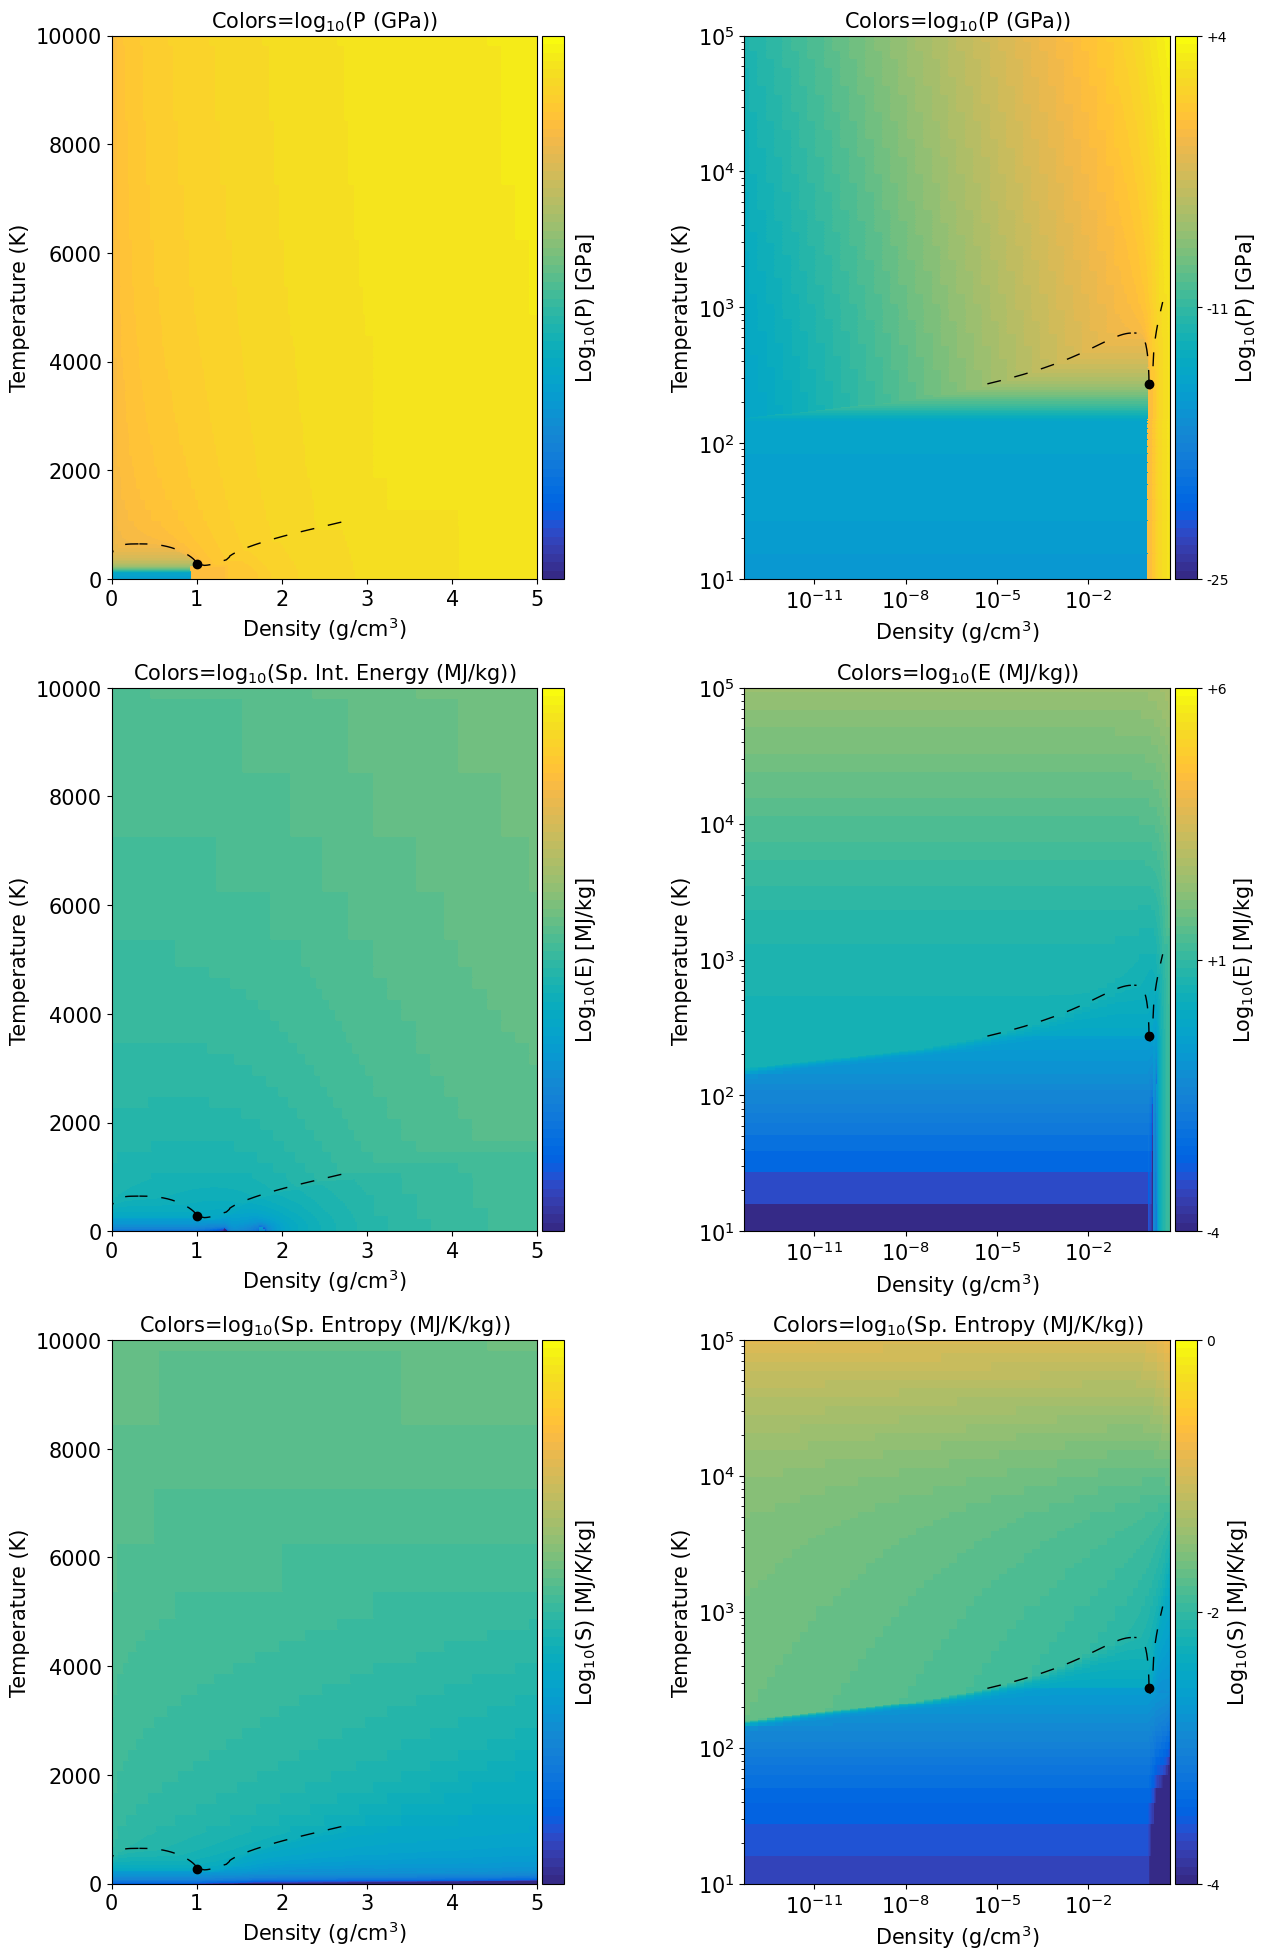

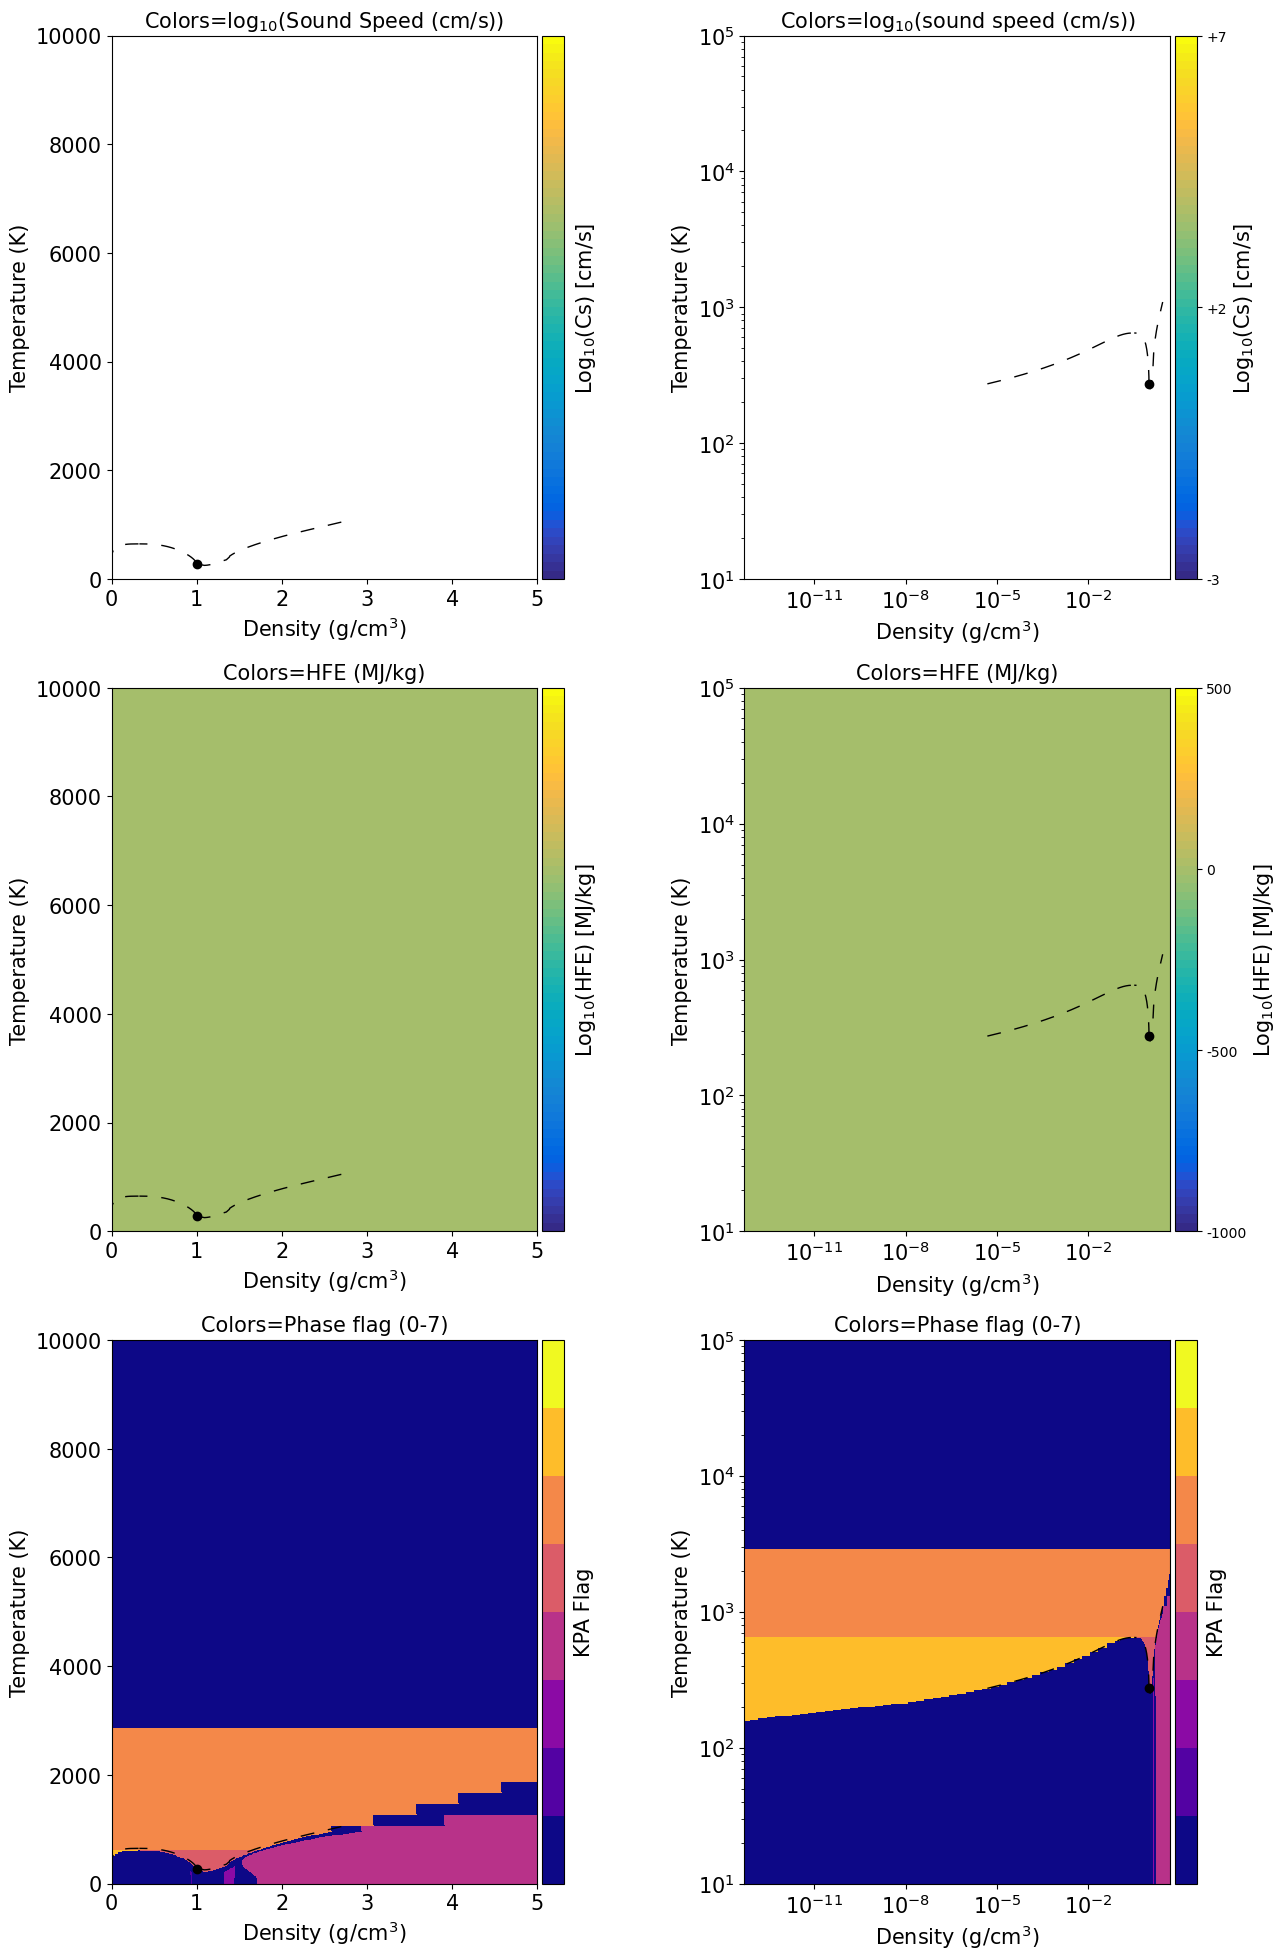

In [13]:
# PLOT COLOR SHADED VALUES RHO-T TABLE
lw=1
sfont = 15
ds = (10,10)
plt.rcParams['pcolor.shading'] ='nearest'

xr2 = [NewEOS.rho[1],max(NewEOS.rho)]
yr2 = [NewEOS.T[1],max(NewEOS.T)]

xr1 = [NewEOS.rho[1],max(NewEOS.rho)]

%matplotlib inline
fig, ([ax0, ax1], [ax2,ax3], [ax4,ax5])= plt.subplots(nrows=3,ncols=2,figsize=(14,24))
plt.subplots_adjust(wspace=0.4)
#plt.tight_layout(pad=0.6)

##================ Pressure
im1=ax0.pcolormesh(NewEOS.rho,NewEOS.T,(np.log10(NewEOS.P)+25)/29.,cmap=local_cmaps.parula,vmin=0,vmax=1,edgecolors='face')
ax0.plot(NewEOS.vc.rl,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax0.plot(NewEOS.vc.rv,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax0.plot(NewEOS.vc.rl[0],NewEOS.vc.T[0],'ko')
if NewEOS.mc.NT > 0:
    ax0.plot(NewEOS.mc.rl,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
#    ax0.plot(NewEOS.mc.rs,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)

ax0.set_ylim(0.,10000)
ax0.set_xlim(xr1)
ax0.set_xlabel('Density (g/cm$^3$)',size=sfont)
ax0.set_ylabel('Temperature (K)',size=sfont)
ax0.set_title('Colors=log$_{10}$(P (GPa))',size=sfont)
ax0.tick_params(labelsize=sfont)

divider0 = make_axes_locatable(ax0)
cax0 = divider0.append_axes('right', size='5%', pad=0.05)
cbar0 = fig.colorbar(im1, cax=cax0, ticks = [],orientation='vertical')
#cbar0.ax.set_yticklabels(['  ','  ','  '])  # vertical colorbar
cbar0.set_label('Log$_{10}$(P) [GPa]',size=sfont)
#cbar0.ax.set_yticklabels(['-25','-11','+4'])  # vertical colorbar

im1=ax1.pcolormesh(NewEOS.rho,NewEOS.T,(np.log10(NewEOS.P)+25)/29.,cmap=local_cmaps.parula,vmin=0,vmax=1,edgecolors='face')
ax1.loglog(NewEOS.vc.rl,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax1.loglog(NewEOS.vc.rv,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax1.loglog(NewEOS.vc.rl[0],NewEOS.vc.T[0],'ko')
if NewEOS.mc.NT > 0:
    ax1.plot(NewEOS.mc.rl,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
#    ax1.plot(NewEOS.mc.rs,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)

ax1.set_ylim(yr2)
ax1.set_xlim(xr2)
ax1.set_xlabel('Density (g/cm$^3$)',size=sfont)
ax1.set_ylabel('Temperature (K)',size=sfont)
ax1.set_title('Colors=log$_{10}$(P (GPa))',size=sfont)
ax1.tick_params(labelsize=sfont)

divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
cbar = fig.colorbar(im1, cax=cax, ticks = [0, 0.5, 1], orientation='vertical')
cbar.ax.set_yticklabels(['-25','-11', '+4'])  # vertical colorbar
cbar.set_label('Log$_{10}$(P) [GPa]',size=sfont)


#================ Sp. Int. Energy
im1=ax2.pcolormesh(NewEOS.rho,NewEOS.T,(np.log10(NewEOS.U)+4.)/10.,cmap=local_cmaps.parula,vmin=0,vmax=1,edgecolors='face')
ax2.plot(NewEOS.vc.rl,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax2.plot(NewEOS.vc.rv,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax2.plot(NewEOS.vc.rl[0],NewEOS.vc.T[0],'ko')
if NewEOS.mc.NT > 0:
    ax2.plot(NewEOS.mc.rl,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
#    ax2.plot(NewEOS.mc.rs,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)

ax2.set_ylim(0.,10000)
ax2.set_xlim(xr1)
ax2.set_xlabel('Density (g/cm$^3$)',size=sfont)
ax2.set_ylabel('Temperature (K)',size=sfont)
ax2.set_title('Colors=log$_{10}$(Sp. Int. Energy (MJ/kg))',size=sfont)
ax2.tick_params(labelsize=sfont)

divider = make_axes_locatable(ax2)
cax = divider.append_axes('right', size='5%', pad=0.05)
# does not want to label ticks in this location
cbar = fig.colorbar(im1, cax=cax, ticks = [], orientation='vertical')
#cbar.ax.set_yticklabels(['','',''])  # vertical colorbar
cbar.set_label('Log$_{10}$(E) [MJ/kg]',size=sfont)
#cbar.ax.set_yticklabels(['-4','+1','+6'])  # vertical colorbar


ax3.pcolormesh(NewEOS.rho,NewEOS.T,(np.log10(NewEOS.U)+4.)/10.,cmap=local_cmaps.parula,vmin=0,vmax=1)
ax3.loglog(NewEOS.vc.rl,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax3.loglog(NewEOS.vc.rv,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax3.loglog(NewEOS.vc.rl[0],NewEOS.vc.T[0],'ko')
if NewEOS.mc.NT > 0:
    ax3.plot(NewEOS.mc.rl,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
#    ax3.plot(NewEOS.mc.rs,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)

ax3.set_ylim(yr2)
ax3.set_xlim(xr2)
ax3.set_xlabel('Density (g/cm$^3$)',size=sfont)
ax3.set_ylabel('Temperature (K)',size=sfont)
ax3.set_title('Colors=log$_{10}$(E (MJ/kg))',size=sfont)
ax3.tick_params(labelsize=sfont)

divider = make_axes_locatable(ax3)
cax = divider.append_axes('right', size='5%', pad=0.05)
#cbar = fig.colorbar(im1, cax=cax, ticks = [0, 0.5, 1], orientation='vertical')
#cbar.ax.set_yticklabels(['-6', '-3.5', '-1'])  # vertical colorbar
cbar = fig.colorbar(im1, cax=cax, ticks = [0, 0.5, 1], orientation='vertical')
cbar.ax.set_yticklabels(['-4', '+1','+6'])  # vertical colorbar
cbar.set_label('Log$_{10}$(E) [MJ/kg]',size=sfont)

#================ Sp. Entropy
im1=ax4.pcolormesh(NewEOS.rho,NewEOS.T,(np.log10(NewEOS.S)+4.)/4.,cmap=local_cmaps.parula,vmin=0,vmax=1,edgecolors='face')
ax4.plot(NewEOS.vc.rl,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax4.plot(NewEOS.vc.rv,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax4.plot(NewEOS.vc.rl[0],NewEOS.vc.T[0],'ko')
if NewEOS.mc.NT > 0:
    ax4.plot(NewEOS.mc.rl,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
#    ax4.plot(NewEOS.mc.rs,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)

ax4.set_ylim(0.,10000)
ax4.set_xlim(xr1)
ax4.set_xlabel('Density (g/cm$^3$)',size=sfont)
ax4.set_ylabel('Temperature (K)',size=sfont)
ax4.set_title('Colors=log$_{10}$(Sp. Entropy (MJ/K/kg))',size=sfont)
ax4.tick_params(labelsize=sfont)

divider = make_axes_locatable(ax4)
cax = divider.append_axes('right', size='5%', pad=0.05)
cbar = fig.colorbar(im1, cax=cax, ticks = [], orientation='vertical')
#cbar.ax.set_yticklabels(['-4', '-2', '0'])  # vertical colorbar
cbar.set_label('Log$_{10}$(S) [MJ/K/kg]',size=sfont)


ax5.pcolormesh(NewEOS.rho,NewEOS.T,(np.log10(NewEOS.S)+4.)/4.,cmap=local_cmaps.parula,vmin=0,vmax=1)
ax5.loglog(NewEOS.vc.rl,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax5.loglog(NewEOS.vc.rv,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax5.loglog(NewEOS.vc.rl[0],NewEOS.vc.T[0],'ko')
if NewEOS.mc.NT > 0:
    ax5.plot(NewEOS.mc.rl,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
#    ax5.plot(NewEOS.mc.rs,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)

ax5.set_ylim(yr2)
ax5.set_xlim(xr2)
ax5.set_xlabel('Density (g/cm$^3$)',size=sfont)
ax5.set_ylabel('Temperature (K)',size=sfont)
ax5.set_title('Colors=log$_{10}$(Sp. Entropy (MJ/K/kg))',size=sfont)
ax5.tick_params(labelsize=sfont)

divider = make_axes_locatable(ax5)
cax = divider.append_axes('right', size='5%', pad=0.05)
#cbar = fig.colorbar(im1, cax=cax, ticks = [0, 0.5, 1], orientation='vertical')
#cbar.ax.set_yticklabels(['-6', '-3.5', '-1'])  # vertical colorbar
cbar = fig.colorbar(im1, cax=cax, ticks = [0, 0.5, 1], orientation='vertical')
cbar.ax.set_yticklabels(['-4', '-2','0'])  # vertical colorbar
cbar.set_label('Log$_{10}$(S) [MJ/K/kg]',size=sfont)

fig.savefig('5Phase-eos-plot1.png')

##============= start new plot
fig2, ([ax0, ax1], [ax2,ax3], [ax4,ax5])= plt.subplots(nrows=3,ncols=2,figsize=(14,24))
plt.subplots_adjust(wspace=0.4)

#================ Sound Speed
im1=ax0.pcolormesh(NewEOS.rho,NewEOS.T,(np.log10(NewEOS.cs)+3.)/10.,cmap=local_cmaps.parula,vmin=0,vmax=1,edgecolors='face')
ax0.plot(NewEOS.vc.rl,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax0.plot(NewEOS.vc.rv,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax0.plot(NewEOS.vc.rl[0],NewEOS.vc.T[0],'ko')
if NewEOS.mc.NT > 0:
    ax0.plot(NewEOS.mc.rl,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
#    ax0.plot(NewEOS.mc.rs,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)

ax0.set_ylim(0.,10000)
ax0.set_xlim(xr1)
ax0.set_xlabel('Density (g/cm$^3$)',size=sfont)
ax0.set_ylabel('Temperature (K)',size=sfont)
ax0.set_title('Colors=log$_{10}$(Sound Speed (cm/s))',size=sfont)
ax0.tick_params(labelsize=sfont)

divider = make_axes_locatable(ax0)
cax = divider.append_axes('right', size='5%', pad=0.05)
cbar = fig.colorbar(im1, cax=cax, ticks = [], orientation='vertical')
#cbar.ax.set_yticklabels(['-3', '+2', '+7'])  # vertical colorbar
cbar.set_label('Log$_{10}$(Cs) [cm/s]',size=sfont)


ax1.pcolormesh(NewEOS.rho,NewEOS.T,(np.log10(NewEOS.cs)+3.)/10.,cmap=local_cmaps.parula,vmin=0,vmax=1)
ax1.loglog(NewEOS.vc.rl,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax1.loglog(NewEOS.vc.rv,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax1.loglog(NewEOS.vc.rl[0],NewEOS.vc.T[0],'ko')
if NewEOS.mc.NT > 0:
    ax1.plot(NewEOS.mc.rl,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
#    ax1.plot(NewEOS.mc.rs,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)

ax1.set_ylim(yr2)
ax1.set_xlim(xr2)
ax1.set_xlabel('Density (g/cm$^3$)',size=sfont)
ax1.set_ylabel('Temperature (K)',size=sfont)
ax1.set_title('Colors=log$_{10}$(sound speed (cm/s))',size=sfont)
ax1.tick_params(labelsize=sfont)

divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
#cbar = fig.colorbar(im1, cax=cax, ticks = [0, 0.5, 1], orientation='vertical')
#cbar.ax.set_yticklabels(['-6', '-3.5', '-1'])  # vertical colorbar
cbar = fig.colorbar(im1, cax=cax, ticks = [0, 0.5, 1], orientation='vertical')
cbar.ax.set_yticklabels(['-3', '+2', '+7'])  # vertical colorbar
cbar.set_label('Log$_{10}$(Cs) [cm/s]',size=sfont)


#================ HFE
amin = np.min(NewEOS.A)
amin = -1000.
alogmax = 1500. #np.max(anaarrodd)-amin #np.max(np.log10(anaarrodd-amin))
#print('amin, log10(amin)',amin,np.log10(-amin))
#print('alogmax=',alogmax)
im1=ax2.pcolormesh(NewEOS.rho,NewEOS.T,(NewEOS.A-amin)/alogmax,cmap=local_cmaps.parula,vmin=0,vmax=1,edgecolors='face')
ax2.plot(NewEOS.vc.rl,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax2.plot(NewEOS.vc.rv,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax2.plot(NewEOS.vc.rl[0],NewEOS.vc.T[0],'ko')
if NewEOS.mc.NT > 0:
    ax2.plot(NewEOS.mc.rl,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
#    ax2.plot(NewEOS.mc.rs,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)

ax2.set_ylim(0.,10000)
ax2.set_xlim(xr1)
ax2.set_xlabel('Density (g/cm$^3$)',size=sfont)
ax2.set_ylabel('Temperature (K)',size=sfont)
ax2.set_title('Colors=HFE (MJ/kg)',size=sfont)
ax2.tick_params(labelsize=sfont)

divider = make_axes_locatable(ax2)
cax = divider.append_axes('right', size='5%', pad=0.05)
cbar = fig.colorbar(im1, cax=cax, ticks = [], orientation='vertical')
#cbar.ax.set_yticklabels(['-1000','-500','0','500'])  # vertical colorbar
cbar.set_label('Log$_{10}$(HFE) [MJ/kg]',size=sfont)


ax3.pcolormesh(NewEOS.rho,NewEOS.T,(NewEOS.A-amin)/alogmax,cmap=local_cmaps.parula,vmin=0,vmax=1)
ax3.loglog(NewEOS.vc.rl,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax3.loglog(NewEOS.vc.rv,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax3.loglog(NewEOS.vc.rl[0],NewEOS.vc.T[0],'ko')
if NewEOS.mc.NT > 0:
    ax3.plot(NewEOS.mc.rl,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
#    ax3.plot(NewEOS.mc.rs,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)

ax3.set_ylim(yr2)
ax3.set_xlim(xr2)
ax3.set_xlabel('Density (g/cm$^3$)',size=sfont)
ax3.set_ylabel('Temperature (K)',size=sfont)
ax3.set_title('Colors=HFE (MJ/kg)',size=sfont)
ax3.tick_params(labelsize=sfont)

divider = make_axes_locatable(ax3)
cax = divider.append_axes('right', size='5%', pad=0.05)
#cbar = fig.colorbar(im1, cax=cax, ticks = [0, 0.5, 1], orientation='vertical')
#cbar.ax.set_yticklabels(['-6', '-3.5', '-1'])  # vertical colorbar
cbar = fig.colorbar(im1, cax=cax, ticks = [0,.333,.6667,  1], orientation='vertical')
cbar.ax.set_yticklabels(['-1000','-500','0','500'])  # vertical colorbar
cbar.set_label('Log$_{10}$(HFE) [MJ/kg]',size=sfont)



#================ KPA flag
cmap2 = cm.get_cmap('plasma', 8)    # 6 discrete colors
im1=ax4.pcolormesh(NewEOS.rho,NewEOS.T,((NewEOS.KPA)+.5)/8.,cmap=cmap2,vmin=0,vmax=1,edgecolors='face')
#im1=ax4.pcolormesh(NewEOS.rho,NewEOS.T,((NewEOS.KPA))/6.,cmap=local_cmaps.parula,vmin=0,vmax=1,edgecolors='face')
ax4.plot(NewEOS.vc.rl,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax4.plot(NewEOS.vc.rv,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax4.plot(NewEOS.vc.rl[0],NewEOS.vc.T[0],'ko')
if NewEOS.mc.NT > 0:
    ax4.plot(NewEOS.mc.rl,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
#    ax4.plot(NewEOS.mc.rs,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)

ax4.set_ylim(0.,10000)
ax4.set_xlim(xr1)
ax4.set_xlabel('Density (g/cm$^3$)',size=sfont)
ax4.set_ylabel('Temperature (K)',size=sfont)
ax4.set_title('Colors=Phase flag (0-7)',size=sfont)
ax4.tick_params(labelsize=sfont)

divider = make_axes_locatable(ax4)
cax = divider.append_axes('right', size='5%', pad=0.05)
cbar = fig.colorbar(im1, cax=cax, ticks = [], orientation='vertical')
#cbar.ax.set_yticklabels(['0','1','2','3','4','5',  '6'])  # vertical colorbar
cbar.set_label('KPA Flag',size=sfont)


ax5.pcolormesh(NewEOS.rho,NewEOS.T,((NewEOS.KPA)+.5)/8.,cmap=cmap2,vmin=0,vmax=1)
ax5.loglog(NewEOS.vc.rl,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax5.loglog(NewEOS.vc.rv,NewEOS.vc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
ax5.loglog(NewEOS.vc.rl[0],NewEOS.vc.T[0],'ko')
if NewEOS.mc.NT > 0:
    ax5.plot(NewEOS.mc.rl,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)
#    ax5.plot(NewEOS.mc.rs,NewEOS.mc.T,color="black",linewidth=lw,linestyle='--',dashes=ds)

ax5.set_ylim(yr2)
ax5.set_xlim(xr2)
ax5.set_xlabel('Density (g/cm$^3$)',size=sfont)
ax5.set_ylabel('Temperature (K)',size=sfont)
ax5.set_title('Colors=Phase flag (0-7)',size=sfont)
ax5.tick_params(labelsize=sfont)

divider = make_axes_locatable(ax5)
cax = divider.append_axes('right', size='5%', pad=0.05)
#cbar = fig.colorbar(im1, cax=cax, ticks = [0, 0.5, 1], orientation='vertical')
#cbar.ax.set_yticklabels(['-6', '-3.5', '-1'])  # vertical colorbar
#cbar = fig.colorbar(im1, cax=cax, ticks = np.arange(13)/12, orientation='vertical')
cbar = fig.colorbar(im1, cax=cax, ticks = [], orientation='vertical')
#cbar.ax.set_yticklabels(['','1','','2','','3','','4','','5','',  '6'])  # vertical colorbar
cbar.set_label('KPA Flag',size=sfont)

fig2.savefig('5phase-eos-plot2.png')




## 5PHASE EOS ID NUMBERS



' 1' ' 6' ' 7' ' L' ' S' ' V' '16' '1L' '67' 'ES' 'L6' 'L7' 'S7' 'V1'
 'VL' 'ZZ'

### END